In [1]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from model_helpers import eval_perform_multi_class
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "../CHESS/data/df1_original_cod.csv"
df_original = pd.read_csv(data_path)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   turns                  20058 non-null  int64
 1   white_rating           20058 non-null  int64
 2   black_rating           20058 non-null  int64
 3   opening_moves          20058 non-null  int64
 4   victory_status_cod     20058 non-null  int64
 5   winner_cod             20058 non-null  int64
 6   time_increment_cod     20058 non-null  int64
 7   opening_code_cod       20058 non-null  int64
 8   opening_fullname_cod   20058 non-null  int64
 9   opening_shortname_cod  20058 non-null  int64
 10  opening_variation_cod  20058 non-null  int64
 11  rated_cod              20058 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


# Df original codificado y sin user_id White_id, Black_id y Opening_response (Variables no relevantes o con muchos valores nulos). 

In [3]:
df = df_original.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida
X = df.drop(columns=[y_name])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df[y_name].ravel()
Y

array([2, 0, 2, ..., 2, 2, 0], dtype=int64)

# Escalamiento de los datos
Después de correr la máquina de soporte vectorial y encontrar que tardaba horas se hizo una investigación con dos descubrimientos.

Cuando se tienen columnas con muchas clases, se incrementa el tiempo de ejecución por mucho esto se ve todavía más grabe con el Kernel lineal.
Por esta razon se aplica un escalamiento estandar y se logra disminuir el tiempo en el algorítmo más tardado (SVM con kernel lineal de 18 horas a XXX). 


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(columns=[y_name])),columns = df.drop(columns=[y_name]).columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)

# Maquina de soporte vectorial

In [5]:
# Crear un clasificador SVM para clasificación con kernel lineal, polinomial y de funcion de base radial
mod_linear = svm.SVC(kernel='linear',C=1, probability=True)
mod_poly = svm.SVC(kernel='poly',degree=2,C=1, probability=True)
mod_rbf = svm.SVC(kernel='rbf',C=1,gamma='auto', probability=True)

In [6]:
# Entrenar el clasificador con los datos de entrenamiento
mod_linear.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)

In [7]:
mod_poly.fit(X_train, Y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)

In [8]:
mod_rbf.fit(X_train, Y_train)

SVC(C=1, gamma='auto', probability=True)


Performance del modelo de Prueba SVM kernel lineal datos originales
 Accu 0.6731472249916916 
 Prec 0.6736744583011485 
 Reca 0.6731472249916916 
 Matriz de confusión:
 [[1589    0 1124]
 [   8  279    5]
 [ 830    0 2183]]

Métricas de Probabilidad:
 Brier Score: 0.13554213888676925 
 AUC 0.7576


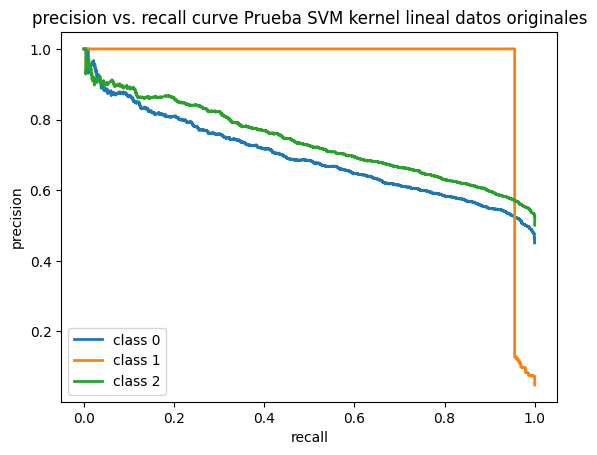

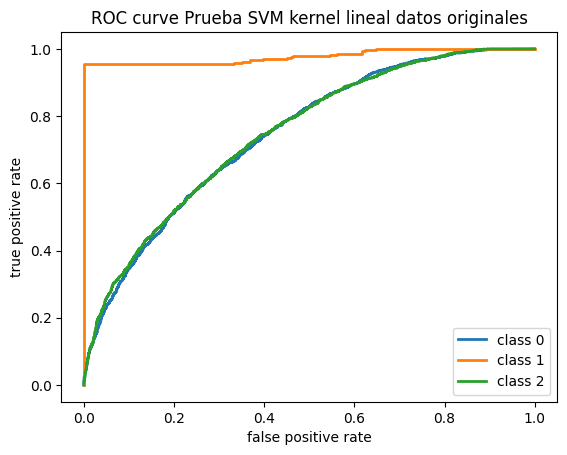


Performance del modelo de Entrenamiento SVM kernel lineal datos originales
 Accu 0.6657407407407407 
 Prec 0.6671560419775766 
 Reca 0.6657407407407407 
 Matriz de confusión:
 [[3599    0 2795]
 [  21  627   10]
 [1867    0 5121]]

Métricas de Probabilidad:
 Brier Score: 0.1372333443583504 
 AUC 0.7520


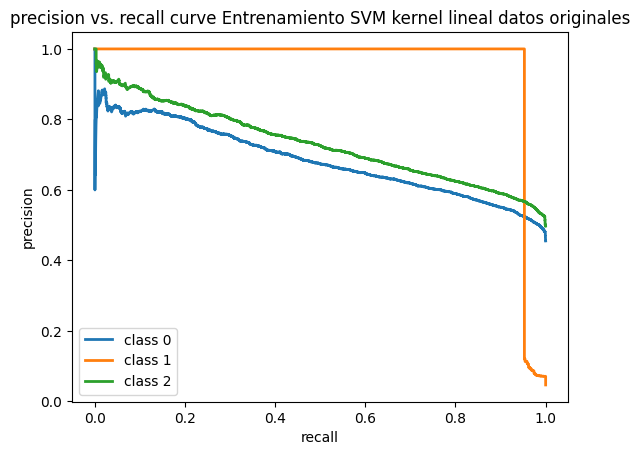

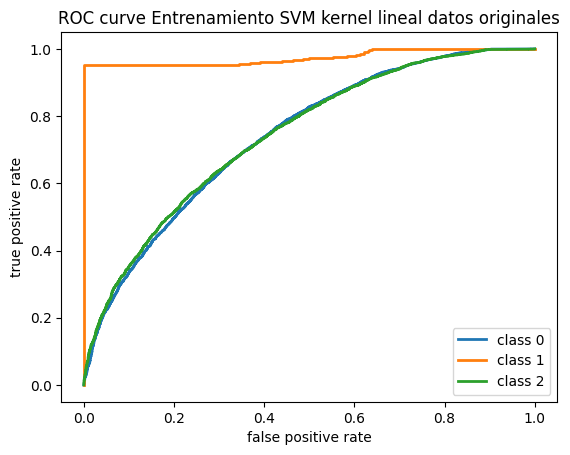

(0.6657407407407407,
 0.6671560419775766,
 0.6657407407407407,
 0.1372333443583504,
 0.7519750584547548,
 array([[3599,    0, 2795],
        [  21,  627,   10],
        [1867,    0, 5121]], dtype=int64))

In [9]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_linear_test = mod_linear.predict(X_test)
Yhat_linear_train = mod_linear.predict(X_train)
Yhat_linear_test_prob = mod_linear.predict_proba(X_test)
Yhat_linear_train_prob = mod_linear.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_linear_test,Yhat_linear_test_prob,3,"Prueba SVM kernel lineal datos originales")
eval_perform_multi_class(Y_train,Yhat_linear_train,Yhat_linear_train_prob,3, "Entrenamiento SVM kernel lineal datos originales")


Performance del modelo de Prueba SVM kernel polinomial datos originales
 Accu 0.564473246925889 
 Prec 0.571797023312855 
 Reca 0.564473246925889 
 Matriz de confusión:
 [[ 467    0 2246]
 [   4  279    9]
 [ 362    0 2651]]

Métricas de Probabilidad:
 Brier Score: 0.15776461898762878 
 AUC 0.6041


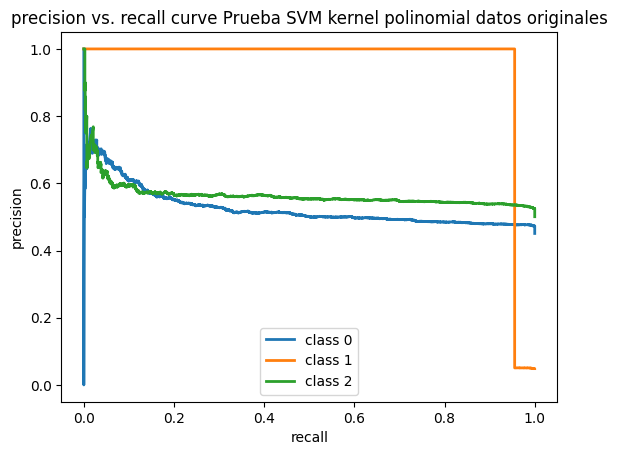

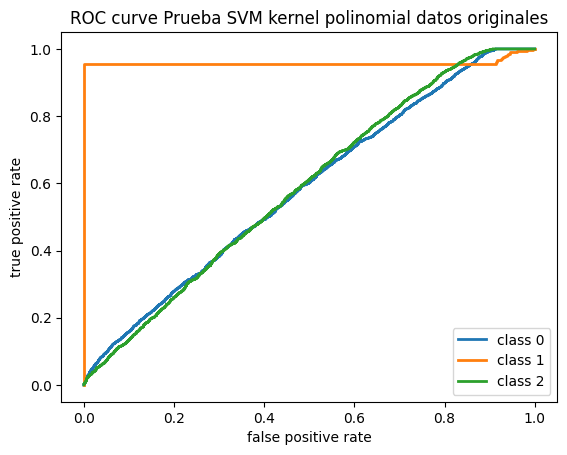


Performance del modelo de Entrenamiento SVM kernel polinomial datos originales
 Accu 0.5722934472934473 
 Prec 0.5962084020189995 
 Reca 0.5722934472934473 
 Matriz de confusión:
 [[1107    0 5287]
 [  12  627   19]
 [ 687    0 6301]]

Métricas de Probabilidad:
 Brier Score: 0.15667884033724566 
 AUC 0.6267


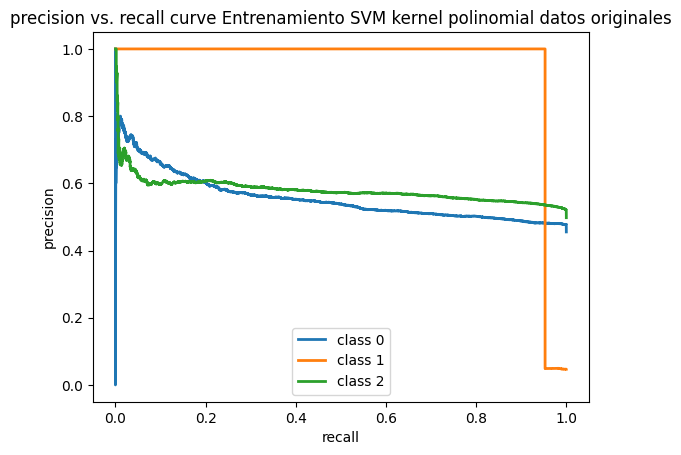

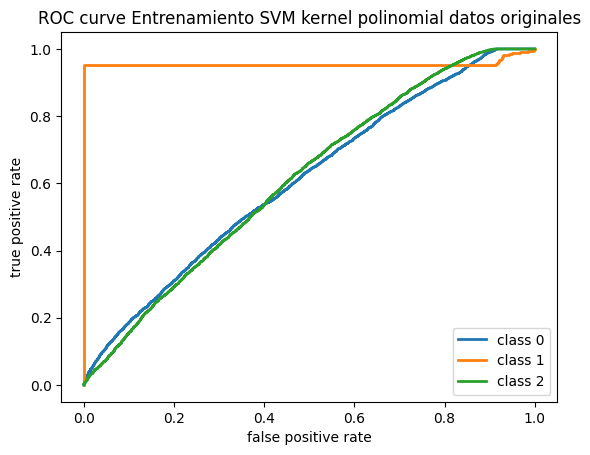

(0.5722934472934473,
 0.5962084020189995,
 0.5722934472934473,
 0.15667884033724566,
 0.6266931471828394,
 array([[1107,    0, 5287],
        [  12,  627,   19],
        [ 687,    0, 6301]], dtype=int64))

In [10]:
Yhat_poly_test = mod_poly.predict(X_test)
Yhat_poly_train = mod_poly.predict(X_train)
Yhat_poly_test_prob = mod_poly.predict_proba(X_test)
Yhat_poly_train_prob = mod_poly.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_poly_test, Yhat_poly_test_prob,3, "Prueba SVM kernel polinomial datos originales")
eval_perform_multi_class(Y_train,Yhat_poly_train, Yhat_poly_train_prob,3, "Entrenamiento SVM kernel polinomial datos originales")


Performance del modelo de Prueba SVM kernel rbf datos originales
 Accu 0.6640079760717846 
 Prec 0.6642485927389545 
 Reca 0.6640079760717846 
 Matriz de confusión:
 [[1566    0 1147]
 [   9  279    4]
 [ 860    2 2151]]

Métricas de Probabilidad:
 Brier Score: 0.13729629009438346 
 AUC 0.7498


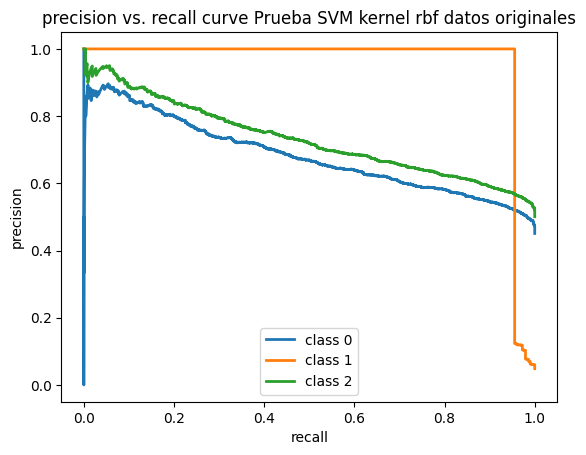

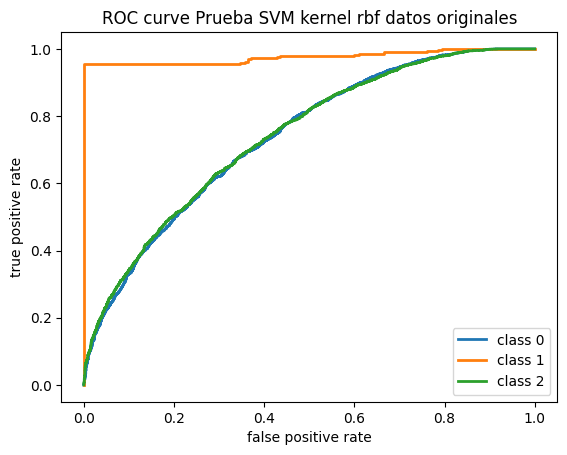


Performance del modelo de Entrenamiento SVM kernel rbf datos originales
 Accu 0.6925213675213675 
 Prec 0.6938261340902612 
 Reca 0.6925213675213675 
 Matriz de confusión:
 [[3860    1 2533]
 [  25  627    6]
 [1752    0 5236]]

Métricas de Probabilidad:
 Brier Score: 0.13010382172531457 
 AUC 0.7834


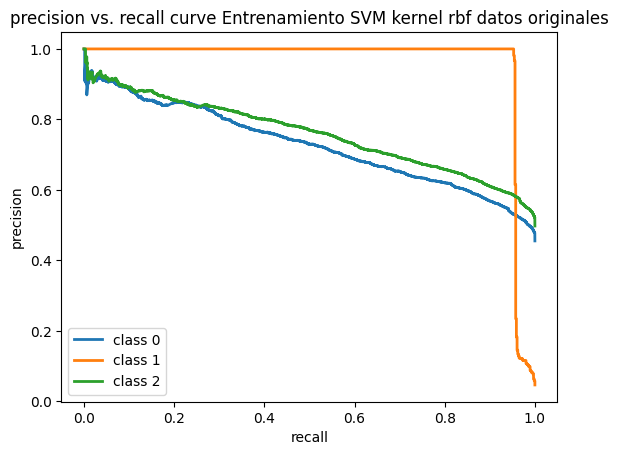

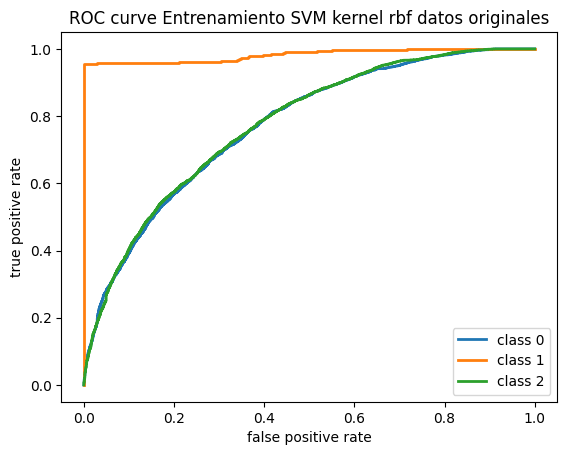

(0.6925213675213675,
 0.6938261340902612,
 0.6925213675213675,
 0.13010382172531457,
 0.7833660885905255,
 array([[3860,    1, 2533],
        [  25,  627,    6],
        [1752,    0, 5236]], dtype=int64))

In [11]:
Yhat_rbf_test = mod_rbf.predict(X_test)
Yhat_rbf_train = mod_rbf.predict(X_train)
Yhat_rbf_test_prob = mod_rbf.predict_proba(X_test)
Yhat_rbf_train_prob = mod_rbf.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_rbf_test, Yhat_rbf_test_prob,3,"Prueba SVM kernel rbf datos originales")
eval_perform_multi_class(Y_train,Yhat_rbf_train, Yhat_rbf_train_prob,3,"Entrenamiento SVM kernel rbf datos originales")

# Regresión logística

In [12]:
from sklearn.linear_model import LogisticRegression
# Comparacion con regresion logistica
# Usar regularización L1 (Lasso)
reg_log = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)

In [13]:
reg_log.fit(X_train,Y_train)

LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear')


Performance del modelo de Prueba regresión logística reg lasso datos originales
 Accu 0.6743104021269525 
 Prec 0.674740440634168 
 Reca 0.6743104021269525 
 Matriz de confusión:
 [[1645    0 1068]
 [   9  276    7]
 [ 876    0 2137]]

Métricas de Probabilidad:
 Brier Score: 0.13984120674035594 
 AUC 0.7565


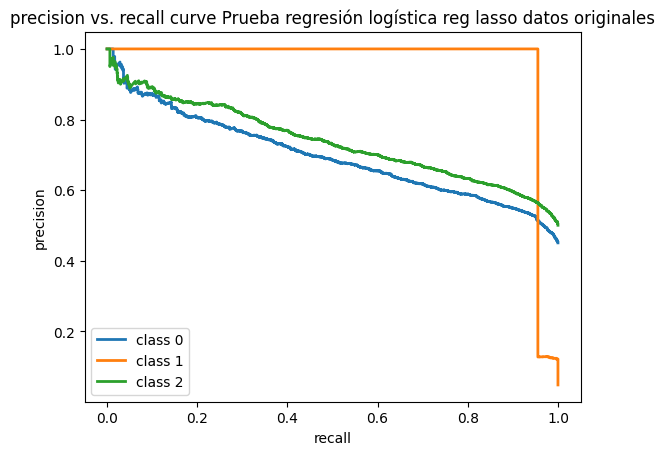

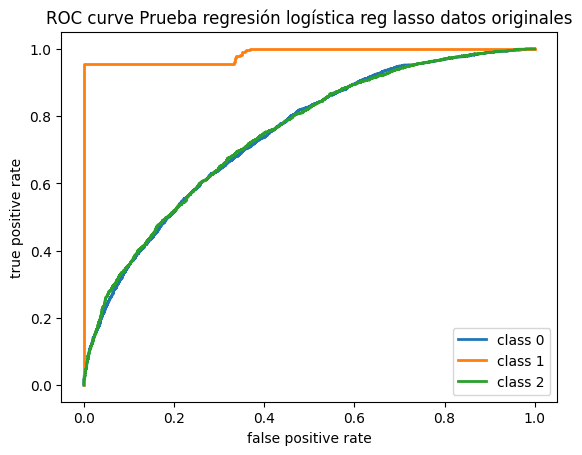


Performance del modelo de Entrenamiento regresión logística reg lasso datos originales
 Accu 0.6651709401709401 
 Prec 0.6658885581957487 
 Reca 0.6651709401709401 
 Matriz de confusión:
 [[3733    0 2661]
 [  22  624   12]
 [2006    0 4982]]

Métricas de Probabilidad:
 Brier Score: 0.1414999175581795 
 AUC 0.7497


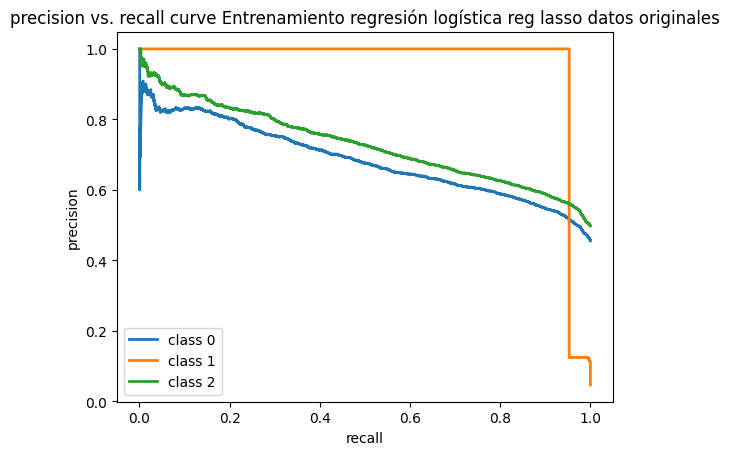

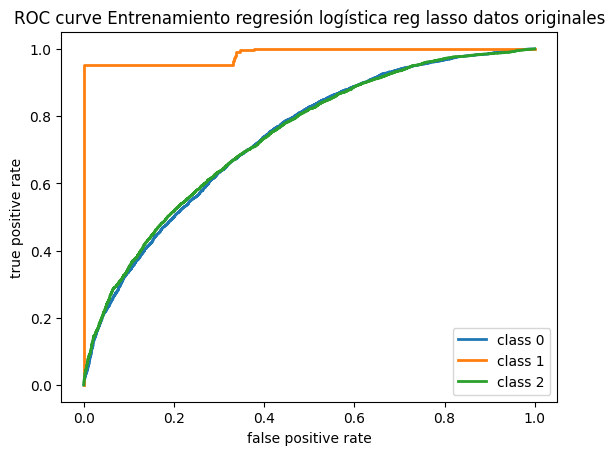

(0.6651709401709401,
 0.6658885581957487,
 0.6651709401709401,
 0.1414999175581795,
 0.7496514255673877,
 array([[3733,    0, 2661],
        [  22,  624,   12],
        [2006,    0, 4982]], dtype=int64))

In [14]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_log_test = reg_log.predict(X_test)
Yhat_log_train = reg_log.predict(X_train)
Yhat_log_test_proba = reg_log.predict_proba(X_test)
Yhat_log_train_proba = reg_log.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_log_test, Yhat_log_test_proba,3,"Prueba regresión logística reg lasso datos originales")
eval_perform_multi_class(Y_train,Yhat_log_train, Yhat_log_train_proba,3,"Entrenamiento regresión logística reg lasso datos originales")

# XGboost de ejemplo para comparar el performance (datos originales)

A pesar de no haber sido visto en clase, se utiliza para comparar este poderoso modelo con los ya presentados con la hipotesis de que se obtendrán mejores resultados.

In [15]:
import xgboost as xgb
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()

In [16]:
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


Performance del modelo de Prueba Xgboost datos originales
 Accu 0.8840146227982718 
 Prec 0.8840701027949216 
 Reca 0.8840146227982718 
 Matriz de confusión:
 [[2363    5  345]
 [   6  279    7]
 [ 332    3 2678]]

Métricas de Probabilidad:
 Brier Score: 0.06349839259865862 
 AUC 0.9436


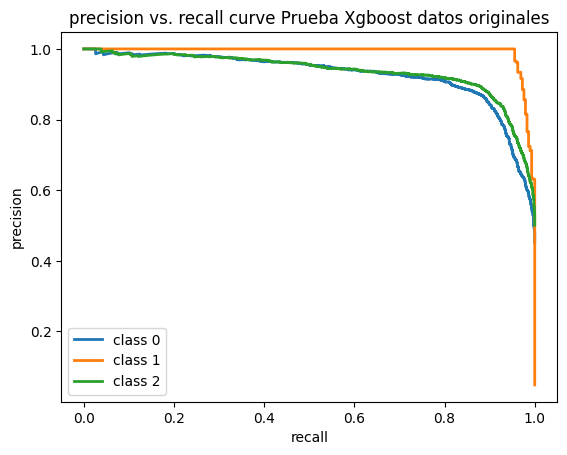

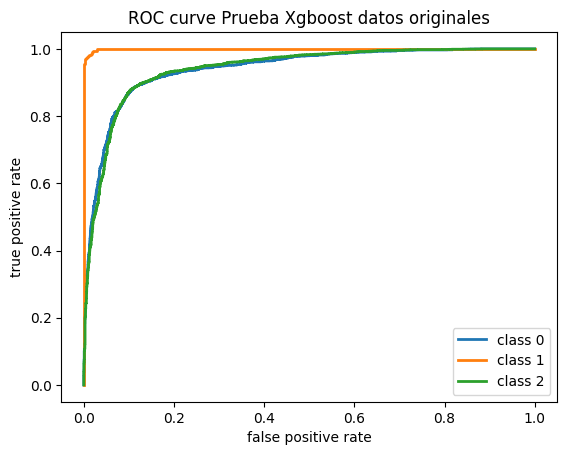


Performance del modelo de Entrenamiento Xgboost datos originales
 Accu 0.9497863247863247 
 Prec 0.9497834270177299 
 Reca 0.9497863247863247 
 Matriz de confusión:
 [[6032    0  362]
 [   0  658    0]
 [ 343    0 6645]]

Métricas de Probabilidad:
 Brier Score: 0.03422342324277703 
 AUC 0.9891


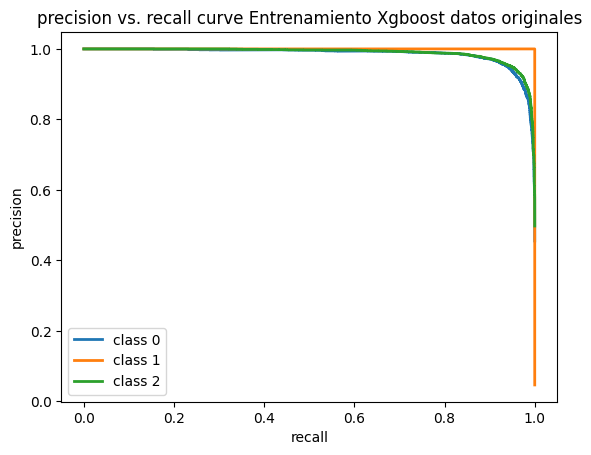

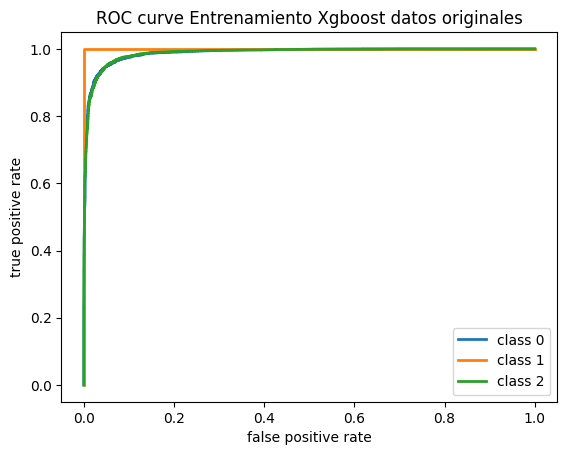

(0.9497863247863247,
 0.9497834270177299,
 0.9497863247863247,
 0.03422342324277703,
 0.9891177240985395,
 array([[6032,    0,  362],
        [   0,  658,    0],
        [ 343,    0, 6645]], dtype=int64))

In [17]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
Yhat_xgboost_test_prob = xgboost.predict_proba(X_test)
Yhat_xgboost_train_prob = xgboost.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_xgboost_test, Yhat_xgboost_test_prob,3,"Prueba Xgboost datos originales")
eval_perform_multi_class(Y_train,Yhat_xgboost_train, Yhat_xgboost_train_prob,3,"Entrenamiento Xgboost datos originales")

In [18]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 14040, number of used features: 11
[LightGBM] [Info] Start training from score -0.786550
[LightGBM] [Info] Start training from score -3.060461
[LightGBM] [Info] Start training from score -0.697716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()


Performance del modelo de Prueba LightGBM datos reales
 Accu 0.8795280824194085 
 Prec 0.8795826060191012 
 Reca 0.8795280824194085 
 Matriz de confusión:
 [[2353    4  356]
 [   8  280    4]
 [ 349    4 2660]]

Métricas de Probabilidad:
 Brier Score: 0.06941091960316824 
 AUC 0.9351


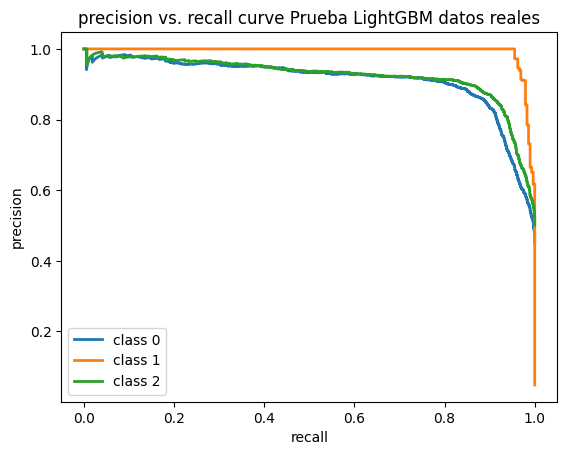

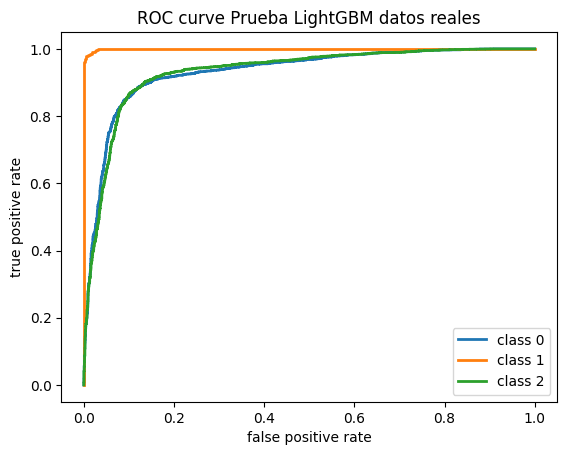


Performance del modelo de Entrenamiento LightGBM datos reales
 Accu 0.9150997150997151 
 Prec 0.9151127103024661 
 Reca 0.9150997150997151 
 Matriz de confusión:
 [[5807    0  587]
 [   0  658    0]
 [ 605    0 6383]]

Métricas de Probabilidad:
 Brier Score: 0.052572066848420786 
 AUC 0.9678


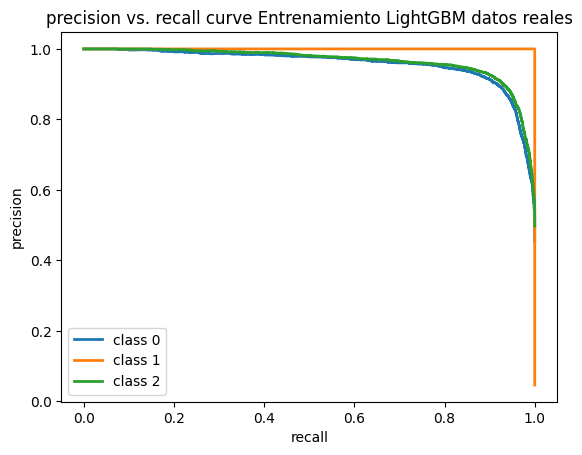

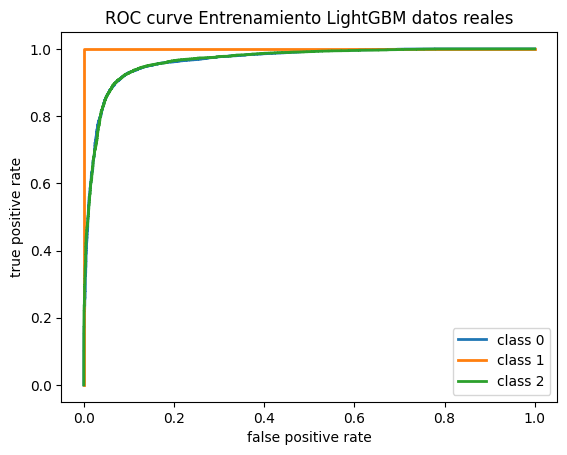

(0.9150997150997151,
 0.9151127103024661,
 0.9150997150997151,
 0.052572066848420786,
 0.9678329516700558,
 array([[5807,    0,  587],
        [   0,  658,    0],
        [ 605,    0, 6383]], dtype=int64))

In [22]:
Yhat_lgbm_test = lgbm.predict(X_test)
Yhat_lgbm_train = lgbm.predict(X_train)
Yhat_lgbm_test_prob = lgbm.predict_proba(X_test)
Yhat_lgbm_train_prob = lgbm.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_lgbm_test,Yhat_lgbm_test_prob, 3, "Prueba LightGBM datos reales")
eval_perform_multi_class(Y_train,Yhat_lgbm_train,Yhat_lgbm_train_prob, 3 ,"Entrenamiento LightGBM datos reales")